**Problem Background**


Kumpulan data tersebut adalah milik perusahaan E-commerce online terkemuka, Belee. Sebuah perusahaan ritel online (E-commerce), Belee, ingin mengetahui pelanggan yang akan berpindah ke perusahaan lain, sehingga mereka dapat melakukan pendekatan kepada pelanggan untuk menawarkan promo.

Secara definisi, customer churn mengacu pada bagian dari siklus hidup pelanggan; retensi pelanggan dan perpindahan pelanggan. Churn pelanggan adalah ketika perusahaan kehilangan pelanggan. Dengan demikian, semakin rendah tingkat churn, semakin banyak pelanggan yang bertahan dalam siklus hidup pelanggan perusahaan.

Perusahaan pasti akan kehilangan pelanggan dalam siklus hidup produk mereka. Namun, tingkat churn yang tinggi dapat menandakan ketidakpuasan pelanggan atau masalah mendasar dalam produk perusahaan.

Tujuan dari pembuatan model machine learning ini adalah: 
- Menganalisa fitur apa saja yang berkaitan dengan Customer Churn.

Untuk membantu menjawab tujuan ini, kami akan mengajukan beberapa pertanyaan penelitian yang berkaitan dengan tujuan proyek ini:

1. Apa saja variabel yang signifikan dalam menyebabkan pelanggan berpindah?
2. Model machine learning apa yang paling cocok untuk menyelidiki customer churn?
3. Variabel apa yang harus difokuskan untuk mempertahankan pelanggan?


In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mcolors

In [133]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
display(df.head(15))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
8,11.0,12.0,4,Mobile Phone,3,Married,2,0,4.0,137.02,0
9,17.0,7.0,3,Laptop & Accessory,1,Married,5,1,2.0,157.43,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Tenure: Tenure of a customer in the company..

WarehouseToHome: Distance between the warehouse to the customer’s home.

NumberOfDeviceRegistered: Total number of deceives is registered on a particular customer.

PreferedOrderCat: Preferred order category of a customer in the last month.

SatisfactionScore: Satisfactory score of a customer on service.

MaritalStatus: Marital status of a customer.

NumberOfAddress: Total number of added on a particular customer.

Complaint: Any complaint has been raised in the last month.

DaySinceLastOrder: Day since last order by customer.

CashbackAmount: Average cashback in last month

Churn: Churn flag.

Variabel-variabel ini dapat berperan dalam menentukan churn flag, karena beberapa dari variabel ini seperti SatisfactionScore, CashbackAmount berperan dalam customer satisfaction. Kepuasan pelanggan memainkan peran utama dalam menentukan churn[1], di mana customer satisfaction yang tinggi dapat menghasilkan tingkat churn yang lebih rendah dari customer.

[1] - Gustaffson, et al., 2005 - The Effects of Customer Satisfaction, Relationship Commitment Dimensions, and Triggers on Customer Retention

In [5]:
df.shape

(3941, 11)

Setelah melakukan observasi terhadap variabel 'Mobile Phone' dan 'Mobile', ada curiga bahwa 2 kategori ini adalah 2 kategori yang sama. Dari situ, kita bisa menggangap `Mobile` dan `Mobile Phone` sebagai `Mobile Phone` sebelum dilakukan data preprocessing lebih lanjut.

In [6]:
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df.head(10)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
8,11.0,12.0,4,Mobile Phone,3,Married,2,0,4.0,137.02,0
9,17.0,7.0,3,Laptop & Accessory,1,Married,5,1,2.0,157.43,0


## Visualisasi seluruh atribut data dengan menggunakan histogram

c:\Users\Great\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Great\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Great\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Great\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

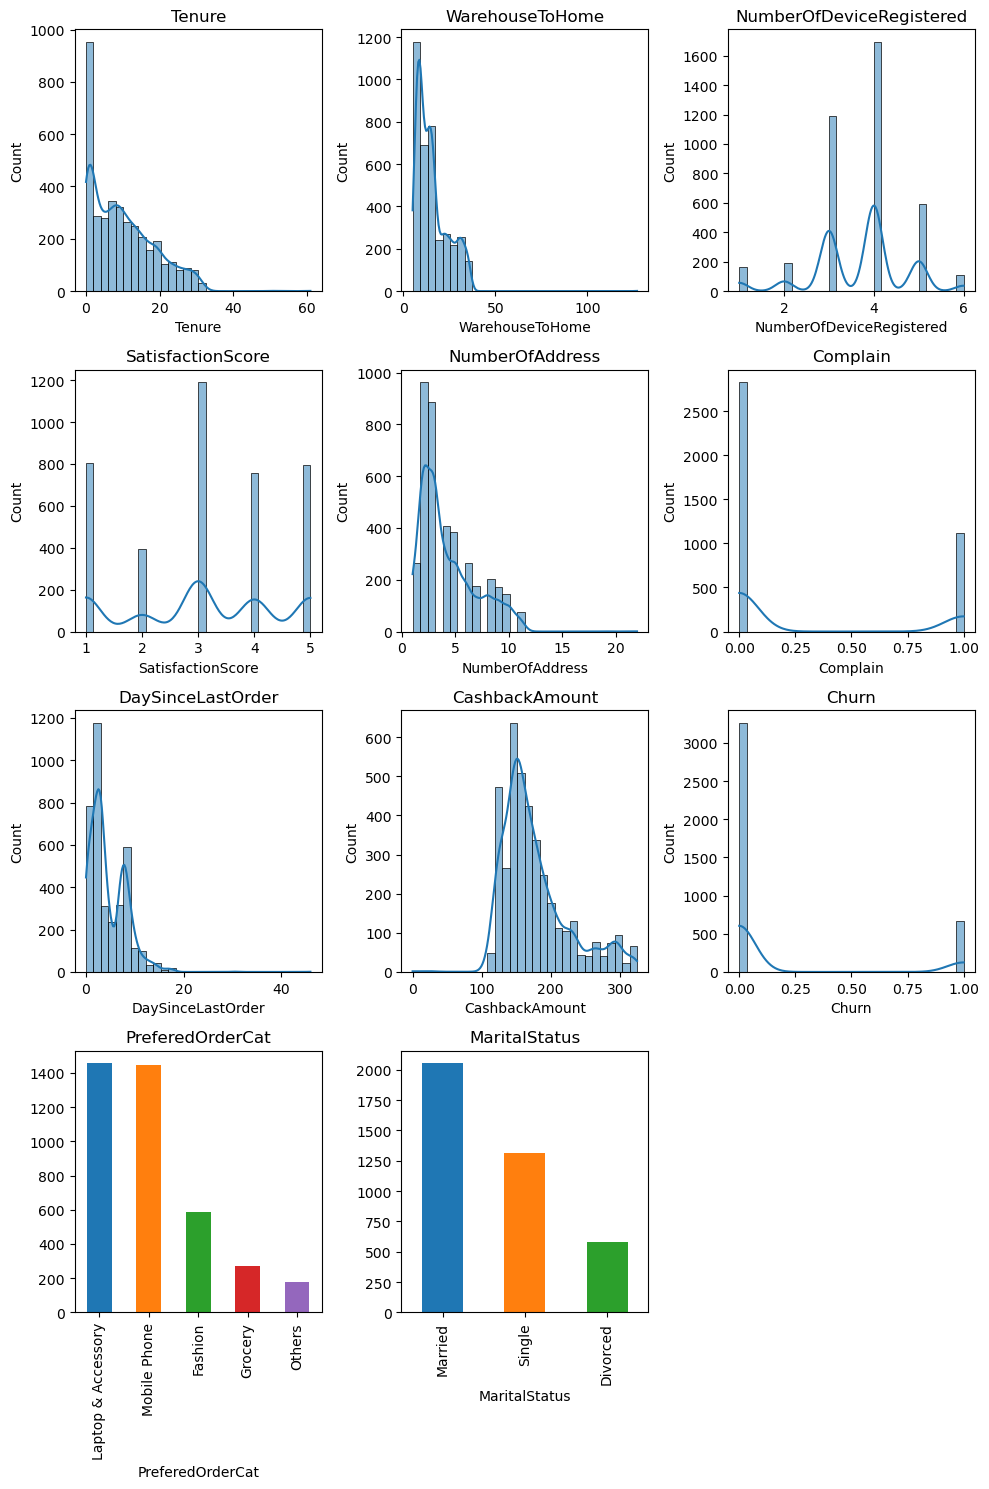

In [7]:
# Create a figure and set its size
plt.figure(figsize=(10, 15))

# Separating columns by dtype
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
object_columns = df.select_dtypes(include=['object']).columns

# Plot numeric columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)

# Plot object columns
for j, column in enumerate(object_columns, 1):
    plt.subplot(4, 3, len(numeric_columns) + j)
    df[column].value_counts().plot(kind="bar", color=mcolors.TABLEAU_COLORS)
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

Dari histogram yang ditampilkan, dapat dilihat bahwa data agak tidak seimbang, dengan distribusi data yang tidak proporsional antara Churn = 0 dan Churn = 1, dengan rasio kasar 7:1. Hal ini menunjukkan bahwa sebagian besar pelanggan dalam produk tersebut tidak melakukan churn dan masih menjadi pengguna produk tersebut.

Kita juga dapat melihat bahwa nilai WarehousetoHome kurang dari 50, yang dapat berarti kurang dari 50 km (karena tidak ada unit yang disebutkan dalam dataset). Ini bisa berarti bahwa semua gudang terletak relatif dekat dengan rumah pelanggan, yang mengarah pada potensi logistik yang lebih baik dan layanan yang lebih cepat, yang bisa menjadi keunggulan kompetitif untuk dimiliki sebagai perusahaan e-commerce.

Hal ini juga bisa dilihat dengan satisfaction score yang relatif terdistribusi normal (dengan 3 sebagai modus + median), tetapi kalau dilihat dari pembagian skor antara 2 dan 4, skor lebih banyak cenderung ke nilai lebih positif >3 (3,4,5). Jadi bisa dibilang bahwa customer lumayan puas dengan e-commerce platform ini.

Perusahaan ini ada kemungkinan sangat agresif dengan promo cashback mereka, dengan sangat sedikit cashback yang kurang dari $ 100 (dalam unit arbitrer). Ini bisa menjadi cara untuk menarik pelanggan dengan memperkenalkan cashback sebagai promosi untuk memberi insentif kepada pengguna agar menggunakan platform ini.

Variabel DaySinceLastOrder juga condong ke arah nilai yang lebih rendah, yang berarti bahwa pelanggan secara aktif menggunakan platform e-commerce dan dapat menandakan bisnis e-commerce berjalan dengan cukup baik, atau bahwa pelanggan secara aktif mengonsumsi produk dalam pasar e-commerce.

Kita dapat melihat dari PreferedOrderCat bahwa kategori yang paling disukai untuk dipesan adalah Laptop & Aksesoris, diikuti oleh Ponsel, dan Fashion.

Kita juga dapat melihat bahwa mayoritas pengguna di platform ini sudah menikah, diikuti oleh lajang, dan kemudian bercerai. 

### Data Cleaning

In [8]:
# Data Cleaning

In [9]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [10]:
df.describe(include='all')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941,3941.000000,3941,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
unique,NaN,NaN,NaN,5,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1458,NaN,2055,NaN,NaN,NaN,NaN,NaN
mean,10.081398,15.650583,3.679269,NaN,3.088302,NaN,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,NaN,1.381832,NaN,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,7.000000,195.250000,0.000000


In [11]:
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[29.0, 11.0]"
1,WarehouseToHome,float64,169,4.29,33,"[7.0, 127.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[5, 4]"
3,PreferedOrderCat,object,0,0.00,5,"[Fashion, Mobile Phone]"
4,SatisfactionScore,int64,0,0.00,5,"[4, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[10, 21]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[10.0, 12.0]"
9,CashbackAmount,float64,0,0.00,2335,"[128.11, 234.38]"


Di sini kita dapat melihat bahwa ada beberapa fitur data yang memiliki nilai nol pada kolom-kolomnya, seperti Tenure, WarehouseToHome, dan DaySinceLastOrder. Karena jumlah variabel yang bernilai null yang relatif tinggi (~5%), kita tidak dapat menghapus baris data yang dimasukkan begitu saja. Selanjutnya, kita perlu menyelidiki entri data yang hilang ini.

<Axes: >

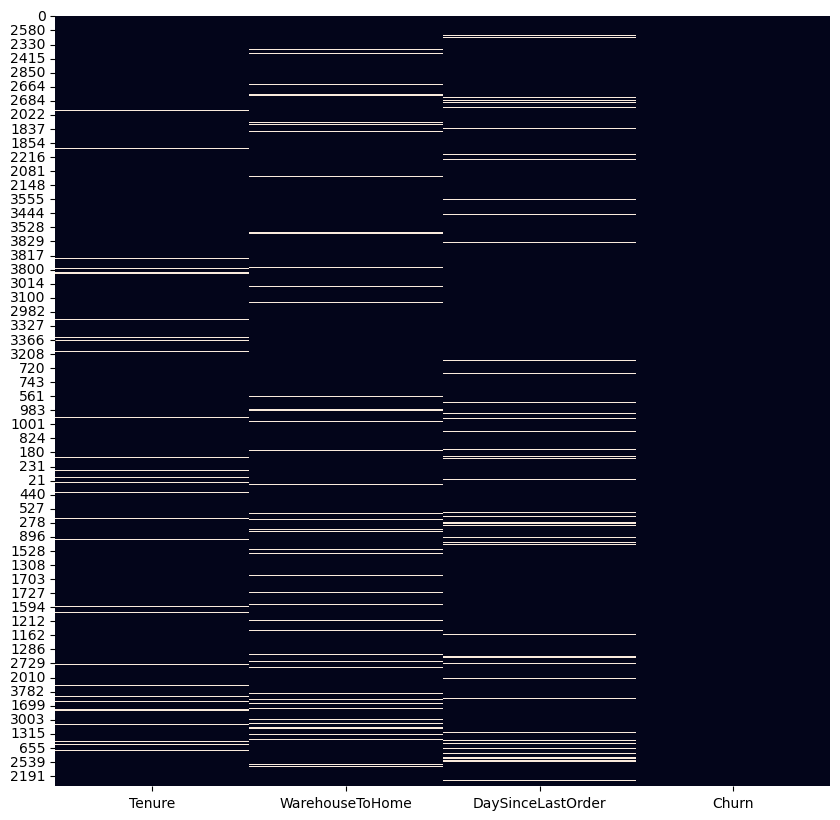

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder','Churn']].sort_values(by='Churn').isna(), cbar=False)

Ketika kita mencoba memvisualisasikan nilai yang hilang dari 3 Fitur Data vs variabel yang ingin kita prediksi (Churn), tidak terlihat bahwa data tersebut hilang karena salah entri atau data tersebut tidak lengkap. Selanjutnya kita dapat mencoba mengkorelasikan data ini untuk melihat apakah ada korelasi di dalam variabel yang hilang itu sendiri.

<Axes: >

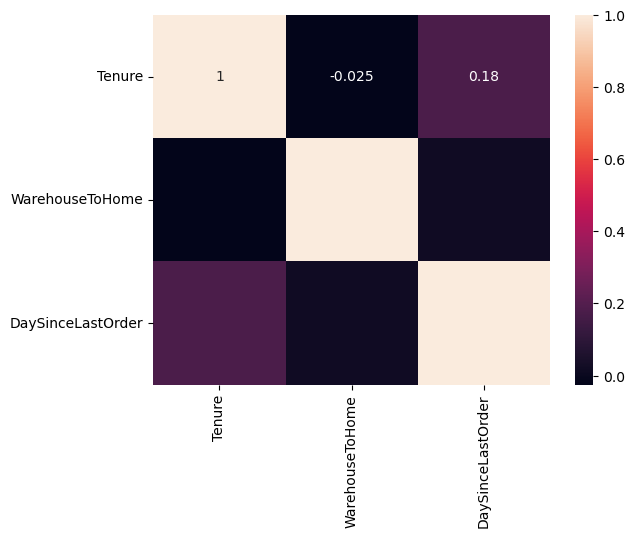

In [13]:
missing_values_df = df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']]
sns.heatmap(missing_values_df.corr(method='pearson'), annot=True)


Dengan melihat matriks korelasi ini, kita dapat melihat bahwa tidak ada korelasi antara variabel yang hilang, yang merupakan salah satu tanda bahwa variabel tersebut hilang secara acak (MAR). Dengan demikian, kita akan dapat menggunakan imputer multivariat untuk memasukkan variabel yang hilang nantinya.

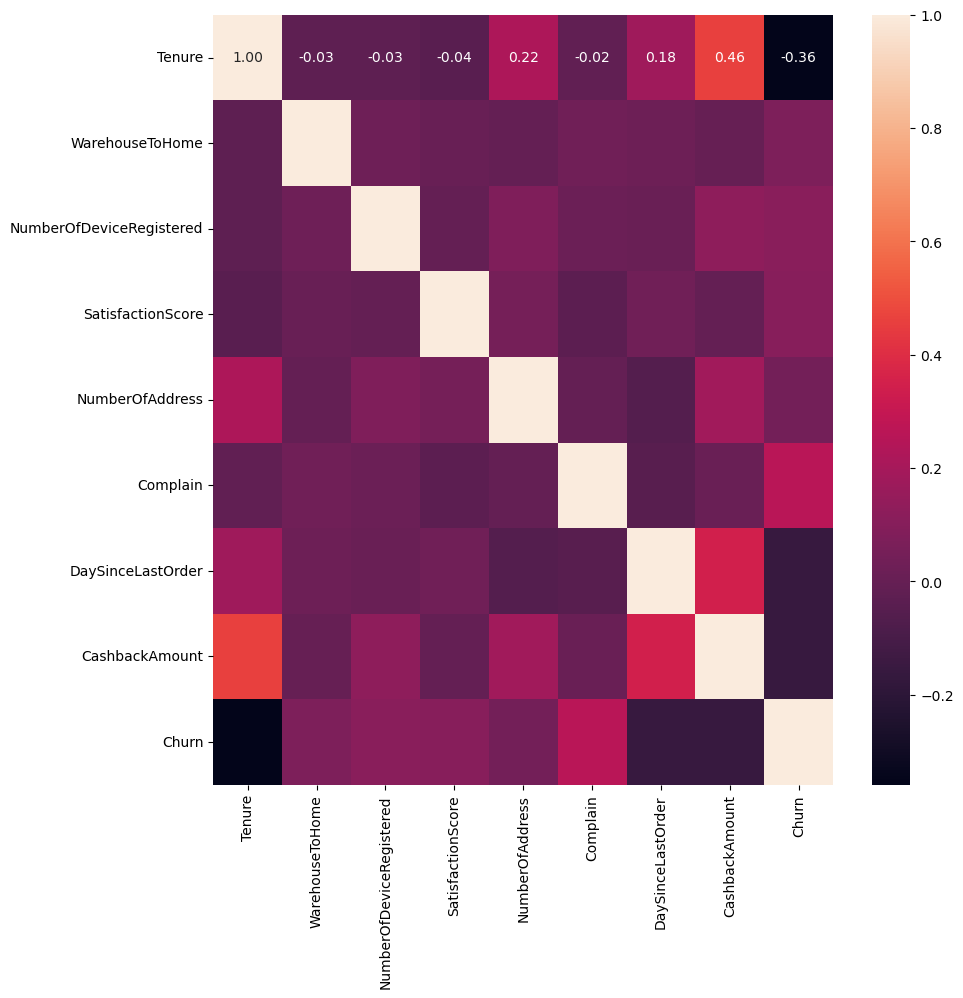

In [77]:
numeric_columns = df_model[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount','Churn']]

correlation_matrix = numeric_columns.corr(method='pearson')

plt.subplots(figsize=(10,10))

# Plot the heatmap with numeric values and increased font size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})

# Show the plot
plt.show()

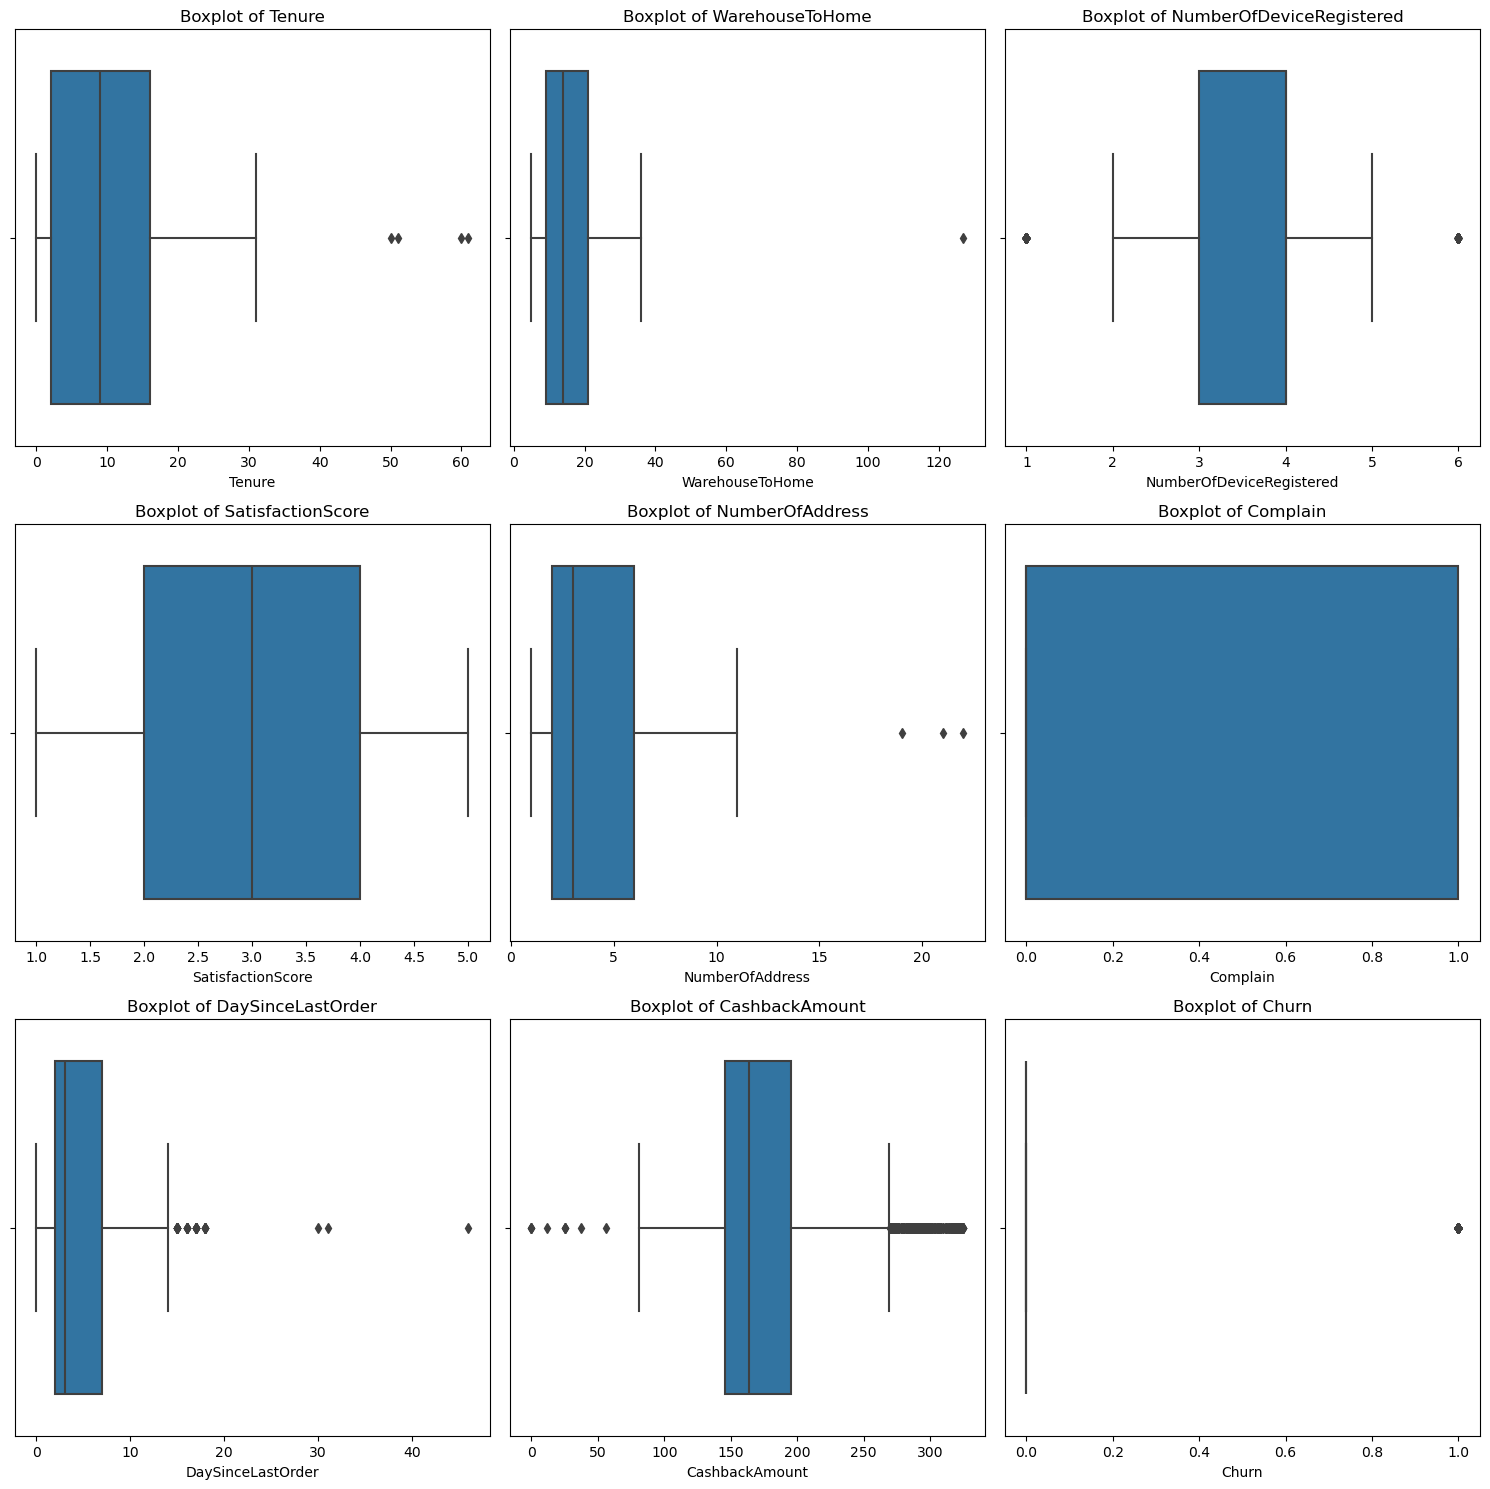

In [33]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(3, num_plots)

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numerical_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(x=df[column], ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f'Boxplot of {column}')

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index][col_index])

plt.tight_layout()
plt.show()

In [34]:
# 1.5 QR Method
df_outliers = df[['Tenure','WarehouseToHome','NumberOfAddress','DaySinceLastOrder','CashbackAmount']]
df_cashback = df['CashbackAmount']

Q1 = np.percentile(df_cashback, 25)

# Calculate the third quartile (Q3)
Q3 = np.percentile(df_cashback, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers beyond the bounds
outliers = df[(df_cashback < lower_bound) | (df_cashback > upper_bound)]

print("Data points beyond the interquartile range (using 1.5 IQR method):")
print(outliers)

Data points beyond the interquartile range (using 1.5 IQR method):
      Tenure  WarehouseToHome  NumberOfDeviceRegistered PreferedOrderCat  \
4       30.0             15.0                         4           Others   
43      17.0             21.0                         4          Grocery   
51      61.0             28.0                         4          Grocery   
101     19.0             21.0                         3           Others   
104     15.0              9.0                         4          Grocery   
...      ...              ...                       ...              ...   
3867    13.0             16.0                         4           Others   
3869     7.0             24.0                         4          Grocery   
3875    18.0              6.0                         1           Others   
3914    17.0             10.0                         1           Others   
3935    26.0              7.0                         4          Grocery   

      SatisfactionSc

Setelah melakukan prapemrosesan data, diketahui bahwa data tersebut bersifat kategorikal, yang berarti bahwa data kategorikal tersebut akan berada dalam format string. Untuk dapat memproses arti dari kategori-kategori ini, kita perlu membuat dummy variables untuk mewakili kategori-kategori ini.

In [258]:
df = pd.get_dummies(df,drop_first=True).replace({True: 1, False: 0})
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,0,0,1,0,0,0,0,1
1,7.0,25.0,4,1,2,0,7.0,129.29,0,0,0,1,0,0,1,0
2,27.0,13.0,3,1,5,0,7.0,168.54,0,0,1,0,0,0,1,0
3,20.0,25.0,4,3,7,0,NaN,230.27,0,0,0,0,0,0,0,0
4,30.0,15.0,4,4,8,0,8.0,322.17,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,3,8,0,1.0,231.86,0,0,0,0,0,0,1,0
3937,8.0,7.0,2,2,4,0,4.0,157.80,0,0,0,0,1,0,0,1
3938,30.0,6.0,5,3,3,1,2.0,156.60,0,0,1,0,0,0,1,0
3939,6.0,NaN,4,3,10,1,0.0,124.37,1,0,0,1,0,0,1,0


### Model Creation

Setelah melihat data dengan baik, di sini kita dapat melihat bahwa churn flag adalah variabel dummy, di mana:

* 0 -> Pelanggan tidak akan melakukan churn
* 1 -> Pelanggan akan melakukan churn

Dari sini, kita dapat dengan aman mengatakan bahwa jenis model yang ingin kita buat untuk model pembelajaran mesin ini adalah model **Klasifikasi**, karena kita ingin **memprediksi** label churn yang benar berdasarkan perilaku pelanggan.
LogisticRegression, KNeighbors, Decision Trees, Random Forest, dan juga membuat tuning hyperparameter sesuai model yang terpilih dengan RandomizedSearchCV.

Kami akan menggunakan LogisticRegression karena dalam kasus kami, kami ingin memprediksi apakah pelanggan akan keluar dari platform e-commerce kami atau tidak melalui klasifikasi Churn.

Cross Validation akan dilakukan dengan menggunakan StratifiedKFold dengan 5 fold karena kita ingin memastikan untuk label yang sama, ada distribusi observasi yang proporsional terhadap setiap labelnya.

In [37]:
!pip install feature-engine

   ---------------------------------------- 0.0/328.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/328.9 kB ? eta -:--:--
   ------- -------------------------------- 61.4/328.9 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 225.3/328.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 328.9/328.9 kB 2.5 MB/s eta 0:00:00


In [129]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer, classification_report, f1_score

In [39]:
# Assign X and y variables
y = df['Churn']
X = df.drop(['Churn'],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# Use about 20% of your data for testing and 80% for training.


In [138]:
def make_pipeline_and_generate_report(X_train, X_test, y_train, y_test):
  # Logistic Regression Model
  lr = LogisticRegression()
  simple_imputer = SimpleImputer()
  multi_imputer = IterativeImputer(random_state=42)
  rob_scaler = RobustScaler()
  scaler = StandardScaler()
  lr_pipeline_model = Pipeline([('imputer',simple_imputer),('normalizer',scaler), ('lr_modelling',lr)])
  lr_pipeline_model2 = Pipeline([('imputer',simple_imputer),('normalizer',rob_scaler), ('lr_modelling',lr)])
  lr_pipeline_model3 = Pipeline([('imputer',multi_imputer),('normalizer',scaler), ('lr_modelling',lr)])
  lr_pipeline_model4 = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('lr_modelling',lr)])


  lr_pipeline_model.fit(X_train,y_train)
  lr_pipeline_model2.fit(X_train,y_train)
  lr_pipeline_model3.fit(X_train,y_train)
  lr_pipeline_model4.fit(X_train,y_train)
  # lr_pipeline_list = [lr_pipeline_model, lr_pipeline_model2, lr_pipeline_model3, lr_pipeline_model4]
  lr_preds = lr_pipeline_model.predict(X_test)
  lr_preds2 = lr_pipeline_model2.predict(X_test)
  lr_preds3 = lr_pipeline_model3.predict(X_test)
  lr_preds4 = lr_pipeline_model4.predict(X_test)
  # lr_score = mean_absolute_error(y_test, lr_preds)
  print(f'Classification Report for Pipeline_SimpleImputer_StandardScaler:')
  print(classification_report(y_test,lr_preds)) #model 1
  print('----------------------------------------')

  print(f'Classification Report for Pipeline_SimpleImputer_RobustScaler:')
  print(classification_report(y_test,lr_preds2)) #model 2
  print('----------------------------------------')

  print(f'Classification Report for Pipeline_IterativeImputer_StandardScaler:')
  print(classification_report(y_test,lr_preds3)) #model 3
  print('----------------------------------------')

  print(f'Classification Report for Pipeline_IterativeImputer_RobustScaler:')
  print(classification_report(y_test,lr_preds4)) #model 4
  print('----------------------------------------')

make_pipeline_and_generate_report(X_train, X_test, y_train, y_test)

Classification Report for Pipeline_SimpleImputer_StandardScaler:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       654
           1       0.44      0.71      0.54       135

    accuracy                           0.79       789
   macro avg       0.68      0.76      0.71       789
weighted avg       0.85      0.79      0.81       789

----------------------------------------
Classification Report for Pipeline_SimpleImputer_RobustScaler:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       654
           1       0.72      0.48      0.58       135

    accuracy                           0.88       789
   macro avg       0.81      0.72      0.75       789
weighted avg       0.87      0.88      0.87       789

----------------------------------------
Classification Report for Pipeline_IterativeImputer_StandardScaler:
              precision    recall  f1-score   support

           0 

Disini kita membuat function untuk test fit dan transform yang mana yang lebih baik untuk modelling kita ini. Dari hasil classification report untuk Logistic Regression ini, kita bisa lihat bahwa tiveImputer dan RobustScaler menghasilkan skor yang lebih bagus dibanding SimpleImputer dan StandardScaler. Hal ini ada kemungkinan karena adanya outlier yang mungkin sangat berpengaruh saat menggunakan StandardScaler.
Saat dibanding hasil SimpleImputer dan IterativeImputer, bisa dilihat bahwa hasil f1-score dll tidak berbeda jauh. Ini juga memastikan bahwa data-data yang missing adalah Missing at Random (MAR). 

In [139]:
lr = LogisticRegression()
simple_imputer = SimpleImputer()
multi_imputer = IterativeImputer(random_state=42)
rob_scaler = RobustScaler()
scaler = StandardScaler()
lr_pipeline_model = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('lr_modelling',lr)])

In [140]:
def make_pipeline_and_generate_report_kn(X_train, X_test, y_train, y_test):
  # KNeighbors Regression Model
  kn = KNeighborsClassifier(n_neighbors= 5)
  simple_imputer = SimpleImputer()
  multi_imputer = IterativeImputer(random_state=42)
  rob_scaler = RobustScaler()
  scaler = StandardScaler()
  kn_pipeline_model = Pipeline([('imputer',simple_imputer),('normalizer',scaler), ('kn_modelling',kn)])
  kn_pipeline_model2 = Pipeline([('imputer',simple_imputer),('normalizer',rob_scaler), ('kn_modelling',kn)])
  kn_pipeline_model3 = Pipeline([('imputer',multi_imputer),('normalizer',scaler), ('kn_modelling',kn)])
  kn_pipeline_model4 = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('kn_modelling',kn)])


  kn_pipeline_model.fit(X_train,y_train)
  kn_pipeline_model2.fit(X_train,y_train)
  kn_pipeline_model3.fit(X_train,y_train)
  kn_pipeline_model4.fit(X_train,y_train)
  # kn_pipeline_list = [kn_pipeline_model, kn_pipeline_model2, kn_pipeline_model3, kn_pipeline_model4]
  kn_preds = kn_pipeline_model.predict(X_test)
  kn_preds2 = kn_pipeline_model2.predict(X_test)
  kn_preds3 = kn_pipeline_model3.predict(X_test)
  kn_preds4 = kn_pipeline_model4.predict(X_test)
  # kn_score = mean_absolute_error(y_test, kn_preds)
  print(f'Classification Report for Pipeline_SimpleImputer_StandardScaler:')
  print(classification_report(y_test,kn_preds)) #model 1
  print('----------------------------------------')

  print(f'Classification Report for Pipeline_SimpleImputer_RobustScaler:')
  print(classification_report(y_test,kn_preds2)) #model 2
  print('----------------------------------------')

  print(f'Classification Report for Pipeline_IterativeImputer_StandardScaler:')
  print(classification_report(y_test,kn_preds3)) #model 3
  print('----------------------------------------')

  print(f'Classification Report for Pipeline_IterativeImputer_RobustScaler:')
  print(classification_report(y_test,kn_preds4)) #model 4
  print('----------------------------------------')

make_pipeline_and_generate_report_kn(X_train, X_test, y_train, y_test)

Classification Report for Pipeline_SimpleImputer_StandardScaler:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       654
           1       0.71      0.58      0.64       135

    accuracy                           0.89       789
   macro avg       0.81      0.76      0.78       789
weighted avg       0.88      0.89      0.88       789

----------------------------------------
Classification Report for Pipeline_SimpleImputer_RobustScaler:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       654
           1       0.70      0.44      0.54       135

    accuracy                           0.87       789
   macro avg       0.80      0.70      0.73       789
weighted avg       0.86      0.87      0.86       789

----------------------------------------
Classification Report for Pipeline_IterativeImputer_StandardScaler:
              precision    recall  f1-score   support

           0 

In [141]:
# KNeighbours Regression Model
kn = KNeighborsClassifier(n_neighbors= 5)
simple_imputer = SimpleImputer()
multi_imputer = IterativeImputer(random_state=42)
rob_scaler = RobustScaler()
scaler = StandardScaler()
kn_pipeline_model = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('kn_modelling',kn)])

In [142]:
def make_pipeline_and_generate_report_dtr(X_train, X_test, y_train, y_test):

    dtr = DecisionTreeClassifier()
    simple_imputer = SimpleImputer()
    multi_imputer = IterativeImputer(random_state=42)
    rob_scaler = RobustScaler()
    scaler = StandardScaler()
    dtr_pipeline_model = Pipeline([('imputer',simple_imputer),('normalizer',scaler), ('dtr_modelling',dtr)])
    dtr_pipeline_model2 = Pipeline([('imputer',simple_imputer),('normalizer',rob_scaler), ('dtr_modelling',dtr)])
    dtr_pipeline_model3 = Pipeline([('imputer',multi_imputer),('normalizer',scaler), ('dtr_modelling',dtr)])
    dtr_pipeline_model4 = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('dtr_modelling',dtr)])


    dtr_pipeline_model.fit(X_train,y_train)
    dtr_pipeline_model2.fit(X_train,y_train)
    dtr_pipeline_model3.fit(X_train,y_train)
    dtr_pipeline_model4.fit(X_train,y_train)
    # dtr_pipeline_list = [dtr_pipeline_model, dtr_pipeline_model2, dtr_pipeline_model3, dtr_pipeline_model4]
    dtr_preds = dtr_pipeline_model.predict(X_test)
    dtr_preds2 = dtr_pipeline_model2.predict(X_test)
    dtr_preds3 = dtr_pipeline_model3.predict(X_test)
    dtr_preds4 = dtr_pipeline_model4.predict(X_test)

    print(f'Classification Report for Pipeline_SimpleImputer_StandardScaler:')
    print(classification_report(y_test,dtr_preds)) #model 1
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_SimpleImputer_RobustScaler:')
    print(classification_report(y_test,dtr_preds2)) #model 2
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_IterativeImputer_StandardScaler:')
    print(classification_report(y_test,dtr_preds3)) #model 3
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_IterativeImputer_RobustScaler:')
    print(classification_report(y_test,dtr_preds4)) #model 4
    print('----------------------------------------')

make_pipeline_and_generate_report_dtr(X_train, X_test, y_train, y_test)

Classification Report for Pipeline_SimpleImputer_StandardScaler:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       654
           1       0.42      0.74      0.53       135

    accuracy                           0.78       789
   macro avg       0.68      0.76      0.70       789
weighted avg       0.85      0.78      0.80       789

----------------------------------------
Classification Report for Pipeline_SimpleImputer_RobustScaler:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       654
           1       0.71      0.81      0.76       135

    accuracy                           0.91       789
   macro avg       0.84      0.87      0.85       789
weighted avg       0.92      0.91      0.91       789

----------------------------------------
Classification Report for Pipeline_IterativeImputer_StandardScaler:
              precision    recall  f1-score   support

           0 

In [143]:
# Decision Tree Regression Model
dtr = DecisionTreeClassifier()
simple_imputer = SimpleImputer()
multi_imputer = IterativeImputer(random_state=42)
rob_scaler = RobustScaler()
scaler = StandardScaler()
dtr_pipeline_model = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('dtr_modelling',dtr)])

In [144]:
def make_pipeline_and_generate_report_rf(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier()
    simple_imputer = SimpleImputer()
    multi_imputer = IterativeImputer(random_state=42)
    rob_scaler = RobustScaler()
    scaler = StandardScaler()
    rf_pipeline_model = Pipeline([('imputer',simple_imputer),('normalizer',scaler), ('rf_modelling',rf)])
    rf_pipeline_model2 = Pipeline([('imputer',simple_imputer),('normalizer',rob_scaler), ('rf_modelling',rf)])
    rf_pipeline_model3 = Pipeline([('imputer',multi_imputer),('normalizer',scaler), ('rf_modelling',rf)])
    rf_pipeline_model4 = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('rf_modelling',rf)])


    rf_pipeline_model.fit(X_train,y_train)
    rf_pipeline_model2.fit(X_train,y_train)
    rf_pipeline_model3.fit(X_train,y_train)
    rf_pipeline_model4.fit(X_train,y_train)
    # rf_pipeline_list = [rf_pipeline_model, rf_pipeline_model2, rf_pipeline_model3, rf_pipeline_model4]
    rf_preds = rf_pipeline_model.predict(X_test)
    rf_preds2 = rf_pipeline_model2.predict(X_test)
    rf_preds3 = rf_pipeline_model3.predict(X_test)
    rf_preds4 = rf_pipeline_model4.predict(X_test)

    print(f'Classification Report for Pipeline_SimpleImputer_StandardScaler:')
    print(classification_report(y_test,rf_preds)) #model 1
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_SimpleImputer_RobustScaler:')
    print(classification_report(y_test,rf_preds2)) #model 2
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_IterativeImputer_StandardScaler:')
    print(classification_report(y_test,rf_preds3)) #model 3
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_IterativeImputer_RobustScaler:')
    print(classification_report(y_test,rf_preds4)) #model 4
    print('----------------------------------------')

make_pipeline_and_generate_report_rf(X_train, X_test, y_train, y_test)

Classification Report for Pipeline_SimpleImputer_StandardScaler:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       654
           1       0.69      0.72      0.71       135

    accuracy                           0.90       789
   macro avg       0.82      0.83      0.82       789
weighted avg       0.90      0.90      0.90       789

----------------------------------------
Classification Report for Pipeline_SimpleImputer_RobustScaler:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       654
           1       0.92      0.75      0.82       135

    accuracy                           0.95       789
   macro avg       0.93      0.87      0.90       789
weighted avg       0.94      0.95      0.94       789

----------------------------------------
Classification Report for Pipeline_IterativeImputer_StandardScaler:
              precision    recall  f1-score   support

           0 

In [145]:
# Random Forest Classifier Model
rf = RandomForestClassifier()
simple_imputer = SimpleImputer()
multi_imputer = IterativeImputer(random_state=42)
rob_scaler = RobustScaler()
rf_pipeline_model = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('rf_modelling',rf)])

In [146]:
def make_pipeline_and_generate_report_xgb(X_train, X_test, y_train, y_test):

    xgb = XGBClassifier()
    simple_imputer = SimpleImputer()
    multi_imputer = IterativeImputer(random_state=42)
    rob_scaler = RobustScaler()
    scaler = StandardScaler()
    xgb_pipeline_model = Pipeline([('imputer',simple_imputer),('normalizer',scaler), ('xgb_modelling',xgb)])
    xgb_pipeline_model2 = Pipeline([('imputer',simple_imputer),('normalizer',rob_scaler), ('xgb_modelling',xgb)])
    xgb_pipeline_model3 = Pipeline([('imputer',multi_imputer),('normalizer',scaler), ('xgb_modelling',xgb)])
    xgb_pipeline_model4 = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('xgb_modelling',xgb)])


    xgb_pipeline_model.fit(X_train,y_train)
    xgb_pipeline_model2.fit(X_train,y_train)
    xgb_pipeline_model3.fit(X_train,y_train)
    xgb_pipeline_model4.fit(X_train,y_train)
    # xgb_pipeline_list = [xgb_pipeline_model, xgb_pipeline_model2, xgb_pipeline_model3, xgb_pipeline_model4]
    xgb_preds = xgb_pipeline_model.predict(X_test)
    xgb_preds2 = xgb_pipeline_model2.predict(X_test)
    xgb_preds3 = xgb_pipeline_model3.predict(X_test)
    xgb_preds4 = xgb_pipeline_model4.predict(X_test)

    print(f'Classification Report for Pipeline_SimpleImputer_StandardScaler:')
    print(classification_report(y_test,xgb_preds)) #model 1
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_SimpleImputer_RobustScaler:')
    print(classification_report(y_test,xgb_preds2)) #model 2
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_IterativeImputer_StandardScaler:')
    print(classification_report(y_test,xgb_preds3)) #model 3
    print('----------------------------------------')

    print(f'Classification Report for Pipeline_IterativeImputer_RobustScaler:')
    print(classification_report(y_test,xgb_preds4)) #model 4
    print('----------------------------------------')

make_pipeline_and_generate_report_xgb(X_train, X_test, y_train, y_test)

Classification Report for Pipeline_SimpleImputer_StandardScaler:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       654
           1       0.59      0.70      0.64       135

    accuracy                           0.86       789
   macro avg       0.76      0.80      0.78       789
weighted avg       0.88      0.86      0.87       789

----------------------------------------
Classification Report for Pipeline_SimpleImputer_RobustScaler:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       654
           1       0.85      0.81      0.83       135

    accuracy                           0.94       789
   macro avg       0.91      0.89      0.90       789
weighted avg       0.94      0.94      0.94       789

----------------------------------------
Classification Report for Pipeline_IterativeImputer_StandardScaler:
              precision    recall  f1-score   support

           0 

In [147]:
# XGBoost Regressor Model
xgb = XGBClassifier()
simple_imputer = SimpleImputer()
multi_imputer = IterativeImputer(random_state=42)
rob_scaler = RobustScaler()
xgb_pipeline_model = Pipeline([('imputer',multi_imputer),('normalizer',rob_scaler), ('xgb_modelling',xgb)])

Setelah bereksperimen lebih lanjut dengan model fitting dari model-model lainnya, ditemukan bahwa antara SimpleImputer dan IterativeImputer, tidak banyak perbedaan yang signifikan di antara hasilnya, yang selanjutnya mengindikasikan bahwa variabel-variabel yang hilang adalah Missing at Random (MAR).
Namun, setelah bereksperimen antara StandardScaler dan RobustScaler, RobustScaler jauh mengungguli StandardScaler, yang mungkin disebabkan oleh adanya outlier di dalam data.

In [51]:
# Define SMAPE scoring function
def smape(A, F):
    numerator = np.abs(F - A)
    denominator = (np.abs(A) + np.abs(F))
    return 100 * np.mean(2 * numerator / denominator)

# Define SMAPE scoring as a string for use in cross_val_score
smape_scorer = make_scorer(smape, greater_is_better=False)


In [148]:
model_dict = {
    'lr_pipeline_model': lr_pipeline_model,
    'kn_pipeline_model': kn_pipeline_model,
    'dtr_pipeline_model': dtr_pipeline_model,
    'rf_pipeline_model': rf_pipeline_model,
    'xgb_pipeline_model': xgb_pipeline_model
}

skfoldcv = StratifiedKFold(5)

# Define scoring metrics
scoring_metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'RMSE': 'neg_root_mean_squared_error',
    'SMAPE': smape_scorer,
    'ROC_AUC': 'roc_auc'
}

# Cross-validate each model and calculate metrics
results = []
for model_name, model in model_dict.items():
    model_results = {'Model': model_name}
    for metric_name, scoring_metric in scoring_metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=skfoldcv, scoring=scoring_metric)
        mean_score = -scores.mean()
        model_results[metric_name] = mean_score
    results.append(model_results)

# Create DataFrame from results
results_df = pd.DataFrame(results)

print(results_df)

                Model       MAE          MAPE      RMSE       SMAPE   ROC_AUC
0   lr_pipeline_model  0.122469  1.385984e+14  0.349353  121.226249 -0.885701
1   kn_pipeline_model  0.123100  1.257242e+14  0.350647  123.818362 -0.862228
2  dtr_pipeline_model  0.092000  2.128801e+14  0.305683   85.450517 -0.835108
3   rf_pipeline_model  0.074875  9.858230e+13  0.271610   75.550381 -0.958006
4  xgb_pipeline_model  0.062820  1.143024e+14  0.250192   63.827250 -0.956272


MAPE dan SMAPE tampaknya bukan merupakan penentu yang baik untuk menentukan model yang paling sesuai, karena angkanya sangat miring. Hal ini bisa jadi karena model kami memiliki banyak nilai 0 atau 1 dari penggunaan variabel dummy, dan metode perhitungan MAPE dan SMAPE sedemikian rupa sehingga adanya terlalu banyak nilai 0 akan membuat perhitungan menjadi miring.
Disini kita juga ada input skor metrik ROC_AUC, karena ROC_AUC skor ini menunjukan ke-efisienan model yang telah dibuat, dan juga menunjukan kemampuan model dalam membedakan nilai positif atau negatif secara terkeseluruhan.

Di sini kita dapat melihat bahwa dari nilai MAE dan RMSE, Model Klasifikasi XGB memberikan hasil yang paling baik, dengan nilai yang paling kecil. 
Setelah dilihat dari hasil MAE dan RMSE, bisa disimpulkan bahwa LogisticRegression dan KN Models tidak begitu bagus dibanding tree models.
Namun, dari nilai ROC_AUC, Random Forest Classifier memiliki performa yang sedikit lebih baik dibandingkan dengan XGB Classifier.
Kita dapat menguji lebih lanjut kapasitas dari kedua model ini dengan melakukan pemodelan benchmark dengan menggunakan test set dan bukan training set.

## Benchmark Modelling

In [254]:
benchmark_dict = {
    'rf_pipeline_model': rf_pipeline_model,
    'xgb_pipeline_model': xgb_pipeline_model
}

skfoldcv = StratifiedKFold(5)

# Define scoring metrics
scoring_metrics = {
    'F1': 'f1',
    'ROC_AUC': 'roc_auc',
}

# Cross-validate each model and calculate metrics
results = []
for model_name, model in benchmark_dict.items():
    model_results = {'Model': model_name}
    for metric_name, scoring_metric in scoring_metrics.items():
        scores = cross_val_score(model, X_test, y_test, cv=skfoldcv, scoring=scoring_metric)
        mean_score = scores.mean()
        model_results[metric_name] = mean_score
    results.append(model_results)

# Create DataFrame from results
results_df = pd.DataFrame(results)

print(results_df)

                Model        F1   ROC_AUC
0   rf_pipeline_model  0.600156  0.911853
1  xgb_pipeline_model  0.680298  0.906147


### Classification Report Random Forest Model

In [150]:
rf_pipeline_model.fit(X_train,y_train)
print(classification_report(y_test,rf_pipeline_model.predict(X_test)))
print("-----------------------------------------------------------------")
print(classification_report(y_train,rf_pipeline_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.91      0.78      0.84       135

    accuracy                           0.95       789
   macro avg       0.93      0.88      0.90       789
weighted avg       0.95      0.95      0.95       789

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2613
           1       1.00      1.00      1.00       539

    accuracy                           1.00      3152
   macro avg       1.00      1.00      1.00      3152
weighted avg       1.00      1.00      1.00      3152



### Classification Report XGB Model

In [151]:
xgb_pipeline_model.fit(X_train,y_train)

print(classification_report(y_test,xgb_pipeline_model.predict(X_test)))
print("-----------------------------------------------------------------")
print(classification_report(y_train,xgb_pipeline_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       654
           1       0.86      0.81      0.84       135

    accuracy                           0.95       789
   macro avg       0.91      0.89      0.90       789
weighted avg       0.94      0.95      0.94       789

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2613
           1       1.00      1.00      1.00       539

    accuracy                           1.00      3152
   macro avg       1.00      1.00      1.00      3152
weighted avg       1.00      1.00      1.00      3152



Kalau dilihat dari skor MAE, RMSE dan ROC_AUC setelah benchmarking, bisa dilihat bahwa XGB Model masih lebih bagus secara MAE dan RMSE, tetapi RF Model lebih bagus dari segi ROC_AUC. Setelah diinvestigasi classification report untuk 2 model ini, bisa dilihat bahwa RF model menghasilkan skor recall dan f-1 score lebih bagus daripada XGB Model. Tetapi karena ingin cek untuk ada kemungkinannya overfitting, kita harus evaluasi model lagi setelah hyperparameter tuning.

## Hyperparameter Tuning

### Hyperparameter Tuning XGBoost

Kita akan mencoba melakukan tuning hyperparameter untuk model terbaik yang terpilih, yaitu XGB Classifier, dengan melakukan tuning XGB Hyperparameter menggunakan RandomizedSearchCV. Tuning hyperparameter penting dalam machine learning, karena dapat membantu mengurangi overfitting, dan juga menemukan parameter terbaik untuk mencapai performa model yang lebih baik.

In [227]:
xgb = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('normalizer', RobustScaler()),
    ('xgb_modelling', XGBClassifier())
])

# Define the hyperparameter grid
param_grid_xgb = {
              'xgb_modelling__max_depth': [1,3,6,10],
              'xgb_modelling__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'xgb_modelling__subsample': [0.1, 0.5, 1.0],
              'xgb_modelling__colsample_bytree': [0.1, 0.5, 1.0],
              'xgb_modelling__n_estimators': [100, 250, 500, 750],
              'xgb_modelling__gamma': [0, 0.1, 0.2, 0.3],
              'xgb_modelling__min_child_weight': [1, 3, 5]
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                   n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)

# Perform the random search
random_search_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imputer',
                                              IterativeImputer(random_state=42)),
                                             ('normalizer', RobustScaler()),
                                             ('xgb_modelling',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            f...
                   param_distributions={'xgb_modelling__colsample_bytree': [0.1,
                                                                            0.5,
                                                                            1.0],
                                        'xgb_modelling__gamma': [0, 0.1, 0.2,
                                                                 0.3],
                                        'xgb_modelling__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2,
                                                                         0.3,
                                                                         0.4],
                                        'xgb_modelling__max_depth': [1, 3, 6,
                                                                     10],
                                        'xgb_modelling__min_child_weight': [1,
                                                                            3,
                                                                            5],
                                        'xgb_modelling__n_estimators': [100,
                                                                        250,
                                                                        500,
                                                                        750],
                                        'xgb_modelling__subsample': [0.1, 0.5,
                                                                     1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [228]:
# Get the best hyperparameters
best_params = random_search_xgb.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model
best_model = random_search_xgb.best_estimator_
best_score = random_search_xgb.best_score_
print("Best score:", best_score)
accuracy = best_model.score(X_test, y_test)
print("Test accuracy of the best model:", accuracy)

Best hyperparameters: {'xgb_modelling__subsample': 1.0, 'xgb_modelling__n_estimators': 500, 'xgb_modelling__min_child_weight': 3, 'xgb_modelling__max_depth': 10, 'xgb_modelling__learning_rate': 0.1, 'xgb_modelling__gamma': 0, 'xgb_modelling__colsample_bytree': 0.5}
Best score: 0.9349573617085503
Test accuracy of the best model: 0.9493029150823827


### Hyperparameter Tuning RF

In [285]:
rf = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('normalizer', RobustScaler()),
    ('rf_modelling', RandomForestClassifier())
])

# Define the hyperparameter grid for Random Forest Classifier
param_grid_rf = {
    'rf_modelling__n_estimators': [100, 200, 300],
    'rf_modelling__max_depth': [None, 5, 10, 20],
    'rf_modelling__min_samples_split': [2, 5, 10],
    'rf_modelling__min_samples_leaf': [1, 2, 4],
    'rf_modelling__bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf,
                                   n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42,error_score='raise')

# Perform the random search
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('imputer',
                                              IterativeImputer(random_state=42)),
                                             ('normalizer', RobustScaler()),
                                             ('rf_modelling',
                                              RandomForestClassifier())]),
                   n_iter=50,
                   param_distributions={'rf_modelling__bootstrap': [True,
                                                                    False],
                                        'rf_modelling__max_depth': [None, 5, 10,
                                                                    20],
                                        'rf_modelling__min_samples_leaf': [1, 2,
                                                                           4],
                                        'rf_modelling__min_samples_split': [2,
                                                                            5,
                                                                            10],
                                        'rf_modelling__n_estimators': [100, 200,
                                                                       300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [286]:
# Get the best hyperparameters
best_params_rf= random_search_rf.best_params_
print("Best hyperparameters:", best_params_rf)

# Evaluate the best model
best_model_rf = random_search_rf.best_estimator_
print(best_model_rf)
best_score_rf = random_search_rf.best_score_
print("Best score:", best_score_rf)
accuracy = best_model_rf.score(X_test, y_test)
print("Test accuracy of the best model:", accuracy)

Best hyperparameters: {'rf_modelling__n_estimators': 200, 'rf_modelling__min_samples_split': 2, 'rf_modelling__min_samples_leaf': 1, 'rf_modelling__max_depth': 20, 'rf_modelling__bootstrap': False}
Pipeline(steps=[('imputer', IterativeImputer(random_state=42)),
                ('normalizer', RobustScaler()),
                ('rf_modelling',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        n_estimators=200))])
Best score: 0.9346414107111413
Test accuracy of the best model: 0.9645120405576679


In [80]:
from sklearn.metrics import f1_score, roc_auc_score

### Scores Before and After Hyperparameter Tuning - XGB Model

#### Before Hyperparameter Tuning

In [287]:
xgb_pipeline_model.fit(X_train,y_train)
y_pred = xgb_pipeline_model.predict(X_test)
f1_nohyper_xgb = f1_score(y_test,y_pred)
print("F1-Score NonHyper:",f1_nohyper_xgb)

roc_auc_nohyper_xgb = roc_auc_score(y_test,y_pred)
print("ROC-AUC After Tuning:", roc_auc_nohyper_xgb)

F1-Score NonHyper: 0.8365019011406842
ROC-AUC After Tuning: 0.8936459395174992


In [288]:
print(classification_report(y_test,xgb_pipeline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       654
           1       0.86      0.81      0.84       135

    accuracy                           0.95       789
   macro avg       0.91      0.89      0.90       789
weighted avg       0.94      0.95      0.94       789



#### After Hyperparameter Tuning

In [289]:
from sklearn.metrics import f1_score
y_pred = best_model.predict(X_test)

f1_hyper_xgb = f1_score(y_test,y_pred)
print("F1-Score Hyper:",f1_hyper_xgb)

roc_auc_hyper_xgb = roc_auc_score(y_test,y_pred)
print("ROC-AUC After Tuning:", roc_auc_hyper_xgb)

F1-Score Hyper: 0.8449612403100776
ROC-AUC After Tuning: 0.8930003397893306


In [290]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.89      0.81      0.84       135

    accuracy                           0.95       789
   macro avg       0.92      0.89      0.91       789
weighted avg       0.95      0.95      0.95       789



In [291]:
xgb_results = pd.DataFrame(
    [
        ['Before Tuning', f1_nohyper_xgb,roc_auc_nohyper_xgb],
        ['After Tuning', f1_hyper_xgb,roc_auc_hyper_xgb]
    ],
    columns=['Tuning', 'F1','ROC-AUC']
)
f1_improve = ((f1_hyper_xgb - f1_nohyper_xgb) / f1_nohyper_xgb) * 100
xgb_results

,Tuning,F1,ROC-AUC
0,Before Tuning,0.836502,0.893646
1,After Tuning,0.844961,0.893000


### Scores Before and After Hyperparameter Tuning - RF

#### Before Hyperparameter Tuning

In [292]:
rf_pipeline_model.fit(X_train,y_train)
y_pred = rf_pipeline_model.predict(X_test)

f1_nohyper_rf = f1_score(y_test,y_pred)
print("F1-Score NonHyper:",f1_nohyper_rf)


roc_auc_nohyper_rf = roc_auc_score(y_test,y_pred)
print("ROC-AUC Before Tuning:", roc_auc_nohyper_rf)


F1-Score NonHyper: 0.8446215139442231
ROC-AUC Before Tuning: 0.8849473326537547


In [293]:
print(classification_report(y_test,rf_pipeline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.91      0.79      0.84       135

    accuracy                           0.95       789
   macro avg       0.94      0.88      0.91       789
weighted avg       0.95      0.95      0.95       789



#### After Hyperparameter Tuning

In [294]:
y_pred = best_model_rf.predict(X_test)

f1_hyper_rf = f1_score(y_test,y_pred)
print("F1-Score Hyper:",f1_hyper_rf)

roc_auc_hyper_rf = roc_auc_score(y_test,y_pred)
print("ROC-AUC After Tuning:", roc_auc_hyper_rf)

scores_hyper_rf = [f1_hyper_rf,roc_auc_hyper_rf]

F1-Score Hyper: 0.8906249999999999
ROC-AUC After Tuning: 0.9168705402650357


In [295]:
print(classification_report(y_test,best_model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       654
           1       0.94      0.84      0.89       135

    accuracy                           0.96       789
   macro avg       0.96      0.92      0.93       789
weighted avg       0.96      0.96      0.96       789



In [296]:
rf_results = pd.DataFrame(
    [
        ['Before Tuning', f1_nohyper_rf,roc_auc_nohyper_rf],
        ['After Tuning', f1_hyper_rf,roc_auc_hyper_rf]
    ],
    columns=['Tuning', 'F1','ROC-AUC']
)
print("RF Tuning Results")
rf_results

RF Tuning Results


,Tuning,F1,ROC-AUC
0,Before Tuning,0.844622,0.884947
1,After Tuning,0.890625,0.916871


In [260]:
print("XGB Tuning Results")

xgb_results

XGB Tuning Results


,Tuning,F1,ROC-AUC
0,Before Tuning,0.836502,0.893646
1,After Tuning,0.844961,0.893000


Setelah dilakukan hyperparameter tuning terhadap XGB dan RF Model, bisa dilihat bahwa hyperparameter tuning ada membantu dengan skor F1, sekitar 3% kenaikan di skor F1 dari 83.1% -> 84.6% untuk XGB model dan 84.5% -> 85.9% Skor MAE dan RMSE juga menurun setelah hyperparameter tuning terhadap kedua model, dan ada penurunan sekitar 7.8% untuk RMSE dan 15% untuk MAE.

Yang menarik disini adalah setelah hyperparameter tuning, skor ROC-AUC antar XGB dan RF Model menjadi 0.90, dan hanya ada perbedaan sekitar 0.005 diantara kedua model tersebut. Setelah hyperparameter tuning, ROC-AUC skor untuk RF Model menaikkan skornya dari 0.88 menjadi 0.89, dibanding dengan XGB Model, dimana adanya penurunan, dari 0.8936 menjadi 0.8390.
Ini ada kemungkinan bahwa adanya overfitting di RF Model, yang di minimalisir setelah hyperparameter tuning. Dari sini kita bisa menyimpulkan bahwa RF Model setelah Hyperparameter tuning performanya lebih bagus daripada XGB Model, dari segi semua skor metrik yang dievaluasi, dari F1 dan ROC-AUC. 

### Feature Selecting - Feature Importances

### XGB Classifier 

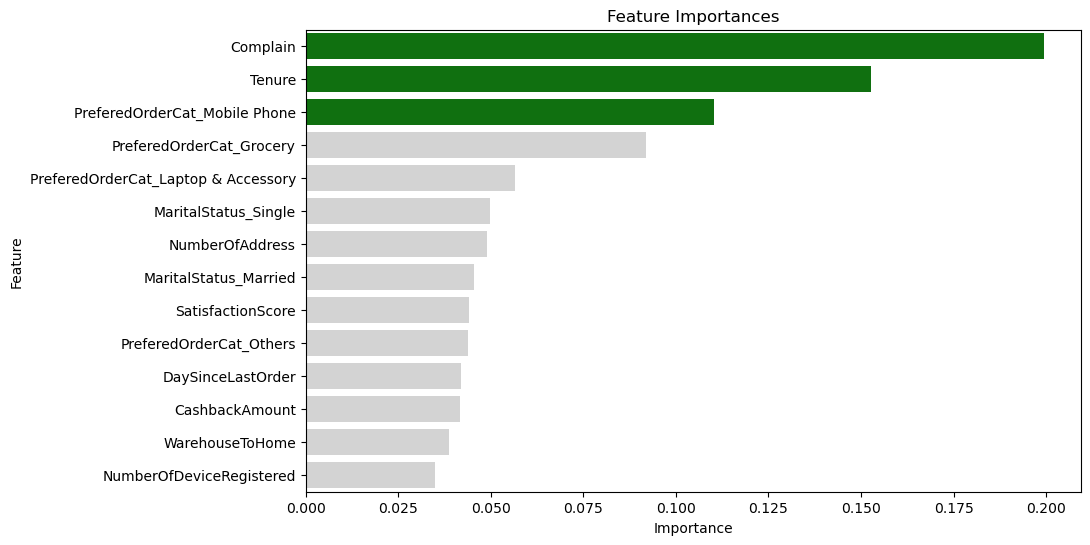

In [244]:
best_model_xgb = random_search_xgb.best_estimator_

xgb_classifier = best_model_xgb.named_steps['xgb_modelling']

# Access feature importances
feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set the number of top features to highlight
top_n = 3
top_features = feature_importance_df['Feature'][:top_n]

bottom_three = 3

# Create a color palette
colors = ['green' if feature in top_features.values else 'lightgrey' for feature in feature_importance_df['Feature']]

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

3 Fitur Terpenting berdasarkan Model Terbaik (Pengklasifikasi XGB):


* Tenure -> Masa tinggal akan memiliki salah satu hubungan terkuat antara churn pelanggan, karena hal ini merepresentasikan customer loyalty. Tenure yang tinggi menandakan customer loyalty yang tinggi, yang bisa mencegah customer churn.
* Complain -> Ketika pelanggan mengeluh, mereka mungkin memiliki kecenderungan untuk berhenti menggunakan produk e-commerce.
* PreferedOrderCategory - Mobile Phones -> Hal ini dapat terjadi karena kategori ini mewakili sebagian besar pesanan yang lebih disukai pelanggan.

Setelah adanya random seed yang dikerjakan sebelumnya, hasil Tenure jauh lebih tinggi daripada Complain. Tetapi dengan adanya random seed, Complain menjadi lebih tinggi daripada Tenure.

### Random Forest Classifier

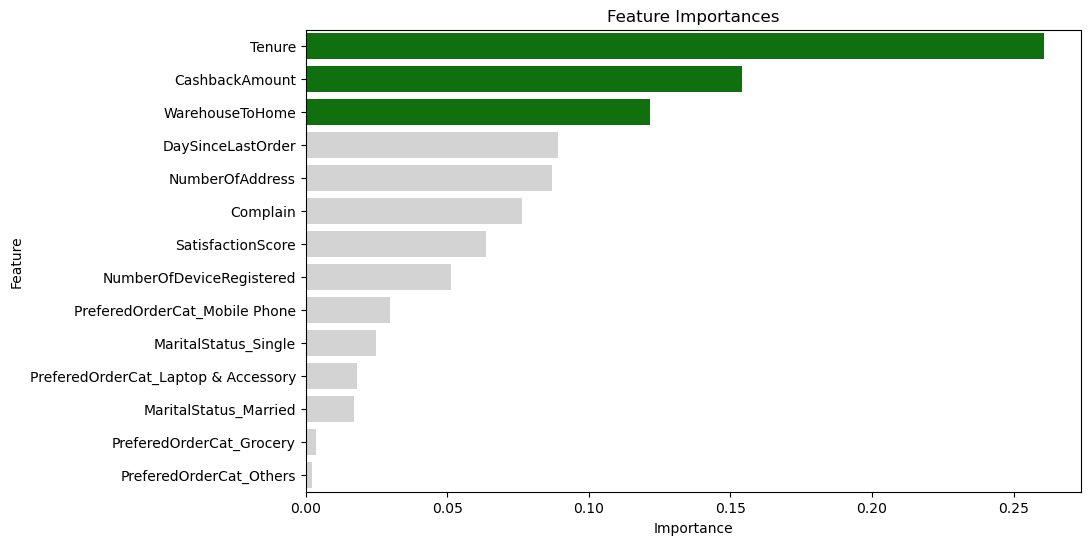

In [297]:
best_model_rf = random_search_rf.best_estimator_

rf_classifier = best_model_rf.named_steps['rf_modelling']

feature_importances_rf = rf_classifier.feature_importances_

feature_importance_rf_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Set the number of top features to highlight
top_n = 3
top_features = feature_importance_rf_df['Feature'][:top_n]

bottom_three = 3

# Create a color palette
colors = ['green' if feature in top_features.values else 'lightgrey' for feature in feature_importance_rf_df['Feature']]

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df, palette=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

3 Fitur Terpenting berdasarkan Model Terbaik (Random Forest Classifier):


* Tenure -> Tenure akan memiliki salah satu hubungan terkuat antara churn pelanggan, karena hal ini merepresentasikan customer loyalty. Tenure yang tinggi menandakan loyalitas pelanggan yang tinggi, yang bisa mencegah churn.
* CashbackAmount -> Pelanggan selalu tertarik untuk mengejar promosi atau cashback berikutnya, karena pelanggan berpikir bahwa hal ini memberikan nilai paling besar bagi mereka dalam hal penggunaan e-commerce, dan akan melihat hal ini sebagai hadiah atas loyalitas pelanggan mereka.
* WarehouseToHome -> Semakin dekat gudang ke rumah pelanggan, semakin rendah biaya pengiriman yang perlu dibebankan. Selain itu, jarak yang lebih dekat juga dapat berarti lebih kecil kemungkinan barang yang dikirim rusak. WarehouseToHome adalah variabel yang berhubungan dengan customer satisfaction.

## Conclusion

- Fitting Transformation yang menghasilkan hasil yang paling bagus untuk Pipeline adalah IterativeImputer(), RobustScaler()

- Dari pengamatan terhadap model-model tersebut, dapat disimpulkan bahwa model-model yang menyerupai pohon seperti Random Forest Classification dan XGB Classification memberikan hasil terbaik dengan nilai F-1 sebesar 86%. Hal ini berarti bahwa model-model tersebut dapat memprediksi hasil positif 89% dari waktu yang ada, dengan akurasi 96% untuk mendapatkan tingkat positif yang benar sebesar 86%.
- Ini artinya, model kita bisa memprediksi bahwa customer akan churn dengan true positive rate 89%, dan hasil ini akurat dari 96% untuk prediksi tersebut.

- Meskipun hasil dari tingkat kepentingan fitur berbeda, baik Random Forest Model maupun XGB Model menunjukkan bahwa "Tenure" merupakan fitur yang paling penting yang akan menentukan customer churn, karena ada masuk dalam top 3 features masing masing model.
- Model Random Forest tampaknya lebih baik dalam menjelaskan pentingnya fitur dalam model dibandingkan dengan Model XGB.
- Semakin lama Tenure dalam platform e-commerce, semakin kecil kemungkinan mereka untuk berpindah. Hal ini dapat mengindikasikan bahwa pelanggan dengan Tenure yang tinggi merupakan pelanggan yang loyal terhadap platform e-commerce, karena berbagai faktor seperti jarak gudang ke rumah, dan jumlah cashback.

## Limitations

- Jumlah churn yang positif atau negatif kurang balance (lebih banyak proporsi 0 dibanding 1), dan bisa jadi butuh pengamatan lebih lanjut untuk bisa mendapatkan proporsi yang lebih balanced.

- Dari menggali dataset asli di Kaggle, ada beberapa variabel yang tidak dimasukkan dalam dataset ini, beberapa darinya yaitu Gender, dan HourSpentOnApp, PreferredPaymentMode, dll., yang mungkin bisa bantu menjelaskan adanya pattern yang lebih dalam di dataset tersebut (contoh: kalau aplikasi tidak ada payment mode yang mayoritas orang pakai, ada kemungkinan customer tidak ingin lanjut memakai platform kita).

- Masih ada beberapa data yang hilang yang mungkin berpengaruh dalam akurasi dan reliabilitas dataset.

## Recommendations

### Recommendations for Model
- Melakukan tes lebih lanjut dalam hyperparameter tuning untuk bisa meningkatkan score recall untuk model ini (karena score precision sudah tinggi, namun recall tidak begitu tinggi dibanding precision) yang bisa meningkatkan skor F1.
- Bisa mencoba tree models yang belum dicoba di eksperimen ini seperti AdaBoost.
- Bisa coba dilakukan Principal Component Analysis (PCA) untuk meningkatkan accuracy lebih lanjut.

### Recommendations for Company
- Tahankan jumlah customer di e-commerce platform ini dengan mempertahankan posisi 'market leader' untuk kategori mayoritas seperti Laptop & Accessory dan Mobile Phone.
- Lakukan promosi dan marketing, atau adanya semacam loyalty program, yang bisa bantu mempertahankan customer loyalty.
- Lakukan investigasi terhadap jumlah cashback yang generate value yang optimal bagi perusahaan dan customer. 
- Meminimalisir complain dengan mencari tahu akar pemasalahan dalam aplikasi

### Saving Models

In [75]:
# save rf model pickle wb
# save xgb model pickle wb
# save

In [255]:
best_model_rf.fit(X, y)

filename = "RF Model Ecommerce.sav"
pickle.dump(best_model_rf, open(filename , "wb")) #write binary